In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set default figsize
plt.rc('figure', figsize=(10,5))

%config InlineBackend.figure_format = 'retina'

Data splitting
- human-based
- percentage-based
- CV-based `sklearn.model_selection.TimeSeriesSplit`

In [ ]:
# human-based
train = df.loc[:'2016'].copy()
test = df.loc['2017'].copy()

In [ ]:
# percentage-based
train_size = .7
# num rows
n = df.shape[0]
test_start_index = round(train_size * n)

# split
train = df.iloc[:test_start_index]
test = df.iloc[test_start_index:]

plt.plot(train.target)
plt.plot(test.target)
plt.show()

In [ ]:
# cv-based
TimeSeriesSplit

In [3]:
url = 'https://gist.githubusercontent.com/ryanorsinger/\
0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv'
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()

In [11]:
ops = pd.read_csv('data/ops_data.csv', index_col='Date')

In [12]:
ops

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [22]:
y=ops['Consumption']

Consumptions

<Axes: xlabel='Consumption', ylabel='Count'>

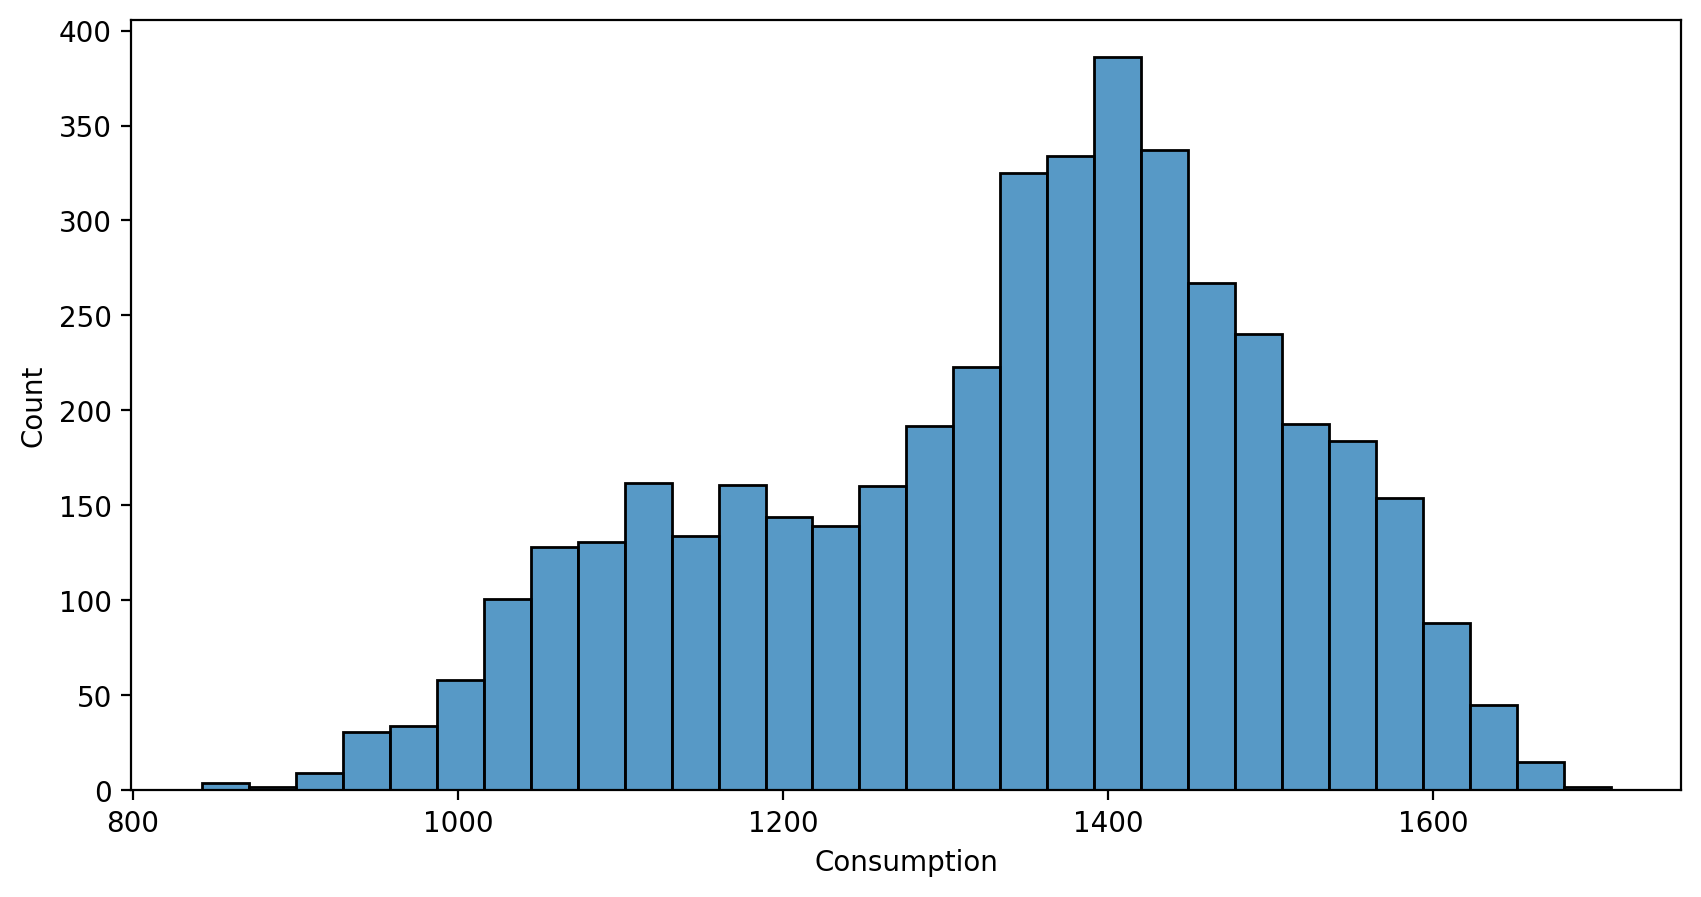

In [23]:
sns.histplot(y)

In [41]:
y.index = pd.to_datetime(y.index)

Monthly Average Consumption

<Axes: xlabel='Date'>

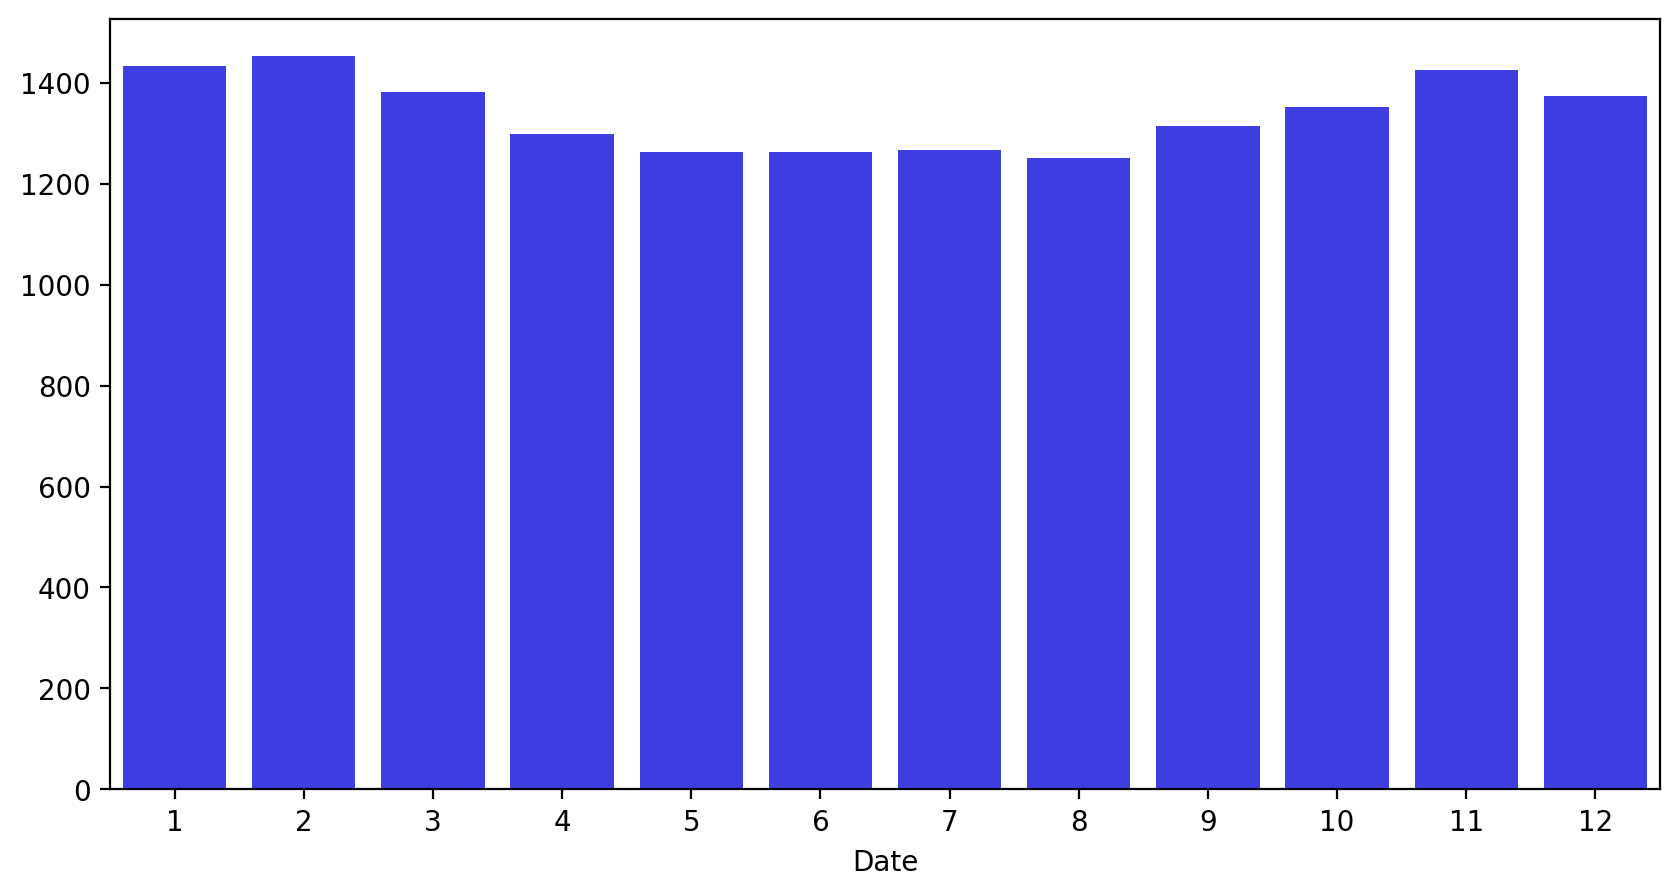

In [38]:
monthly_mean = y.groupby(y.index.month).mean()

sns.barplot(x=monthly_mean.index, y=monthly_mean.values, color='#2222FF')


Monthly Total Consumption

<Axes: xlabel='Date'>

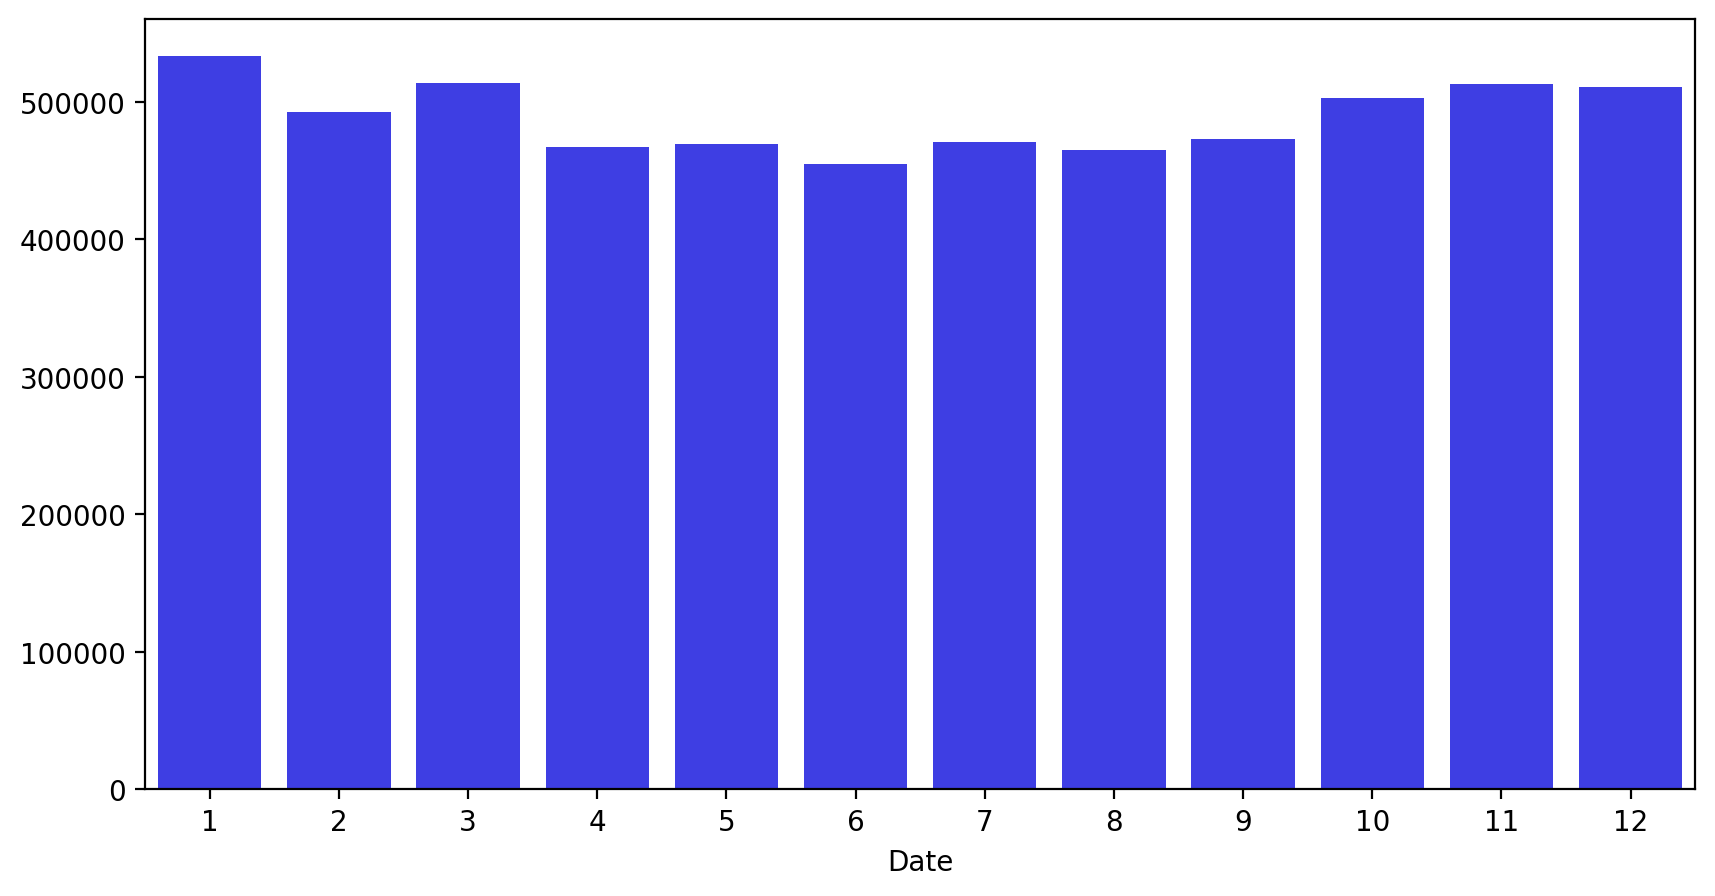

In [39]:
monthly_sum = y.groupby(y.index.month).sum()

sns.barplot(x=monthly_sum.index, y=monthly_sum.values, color='#2222FF')

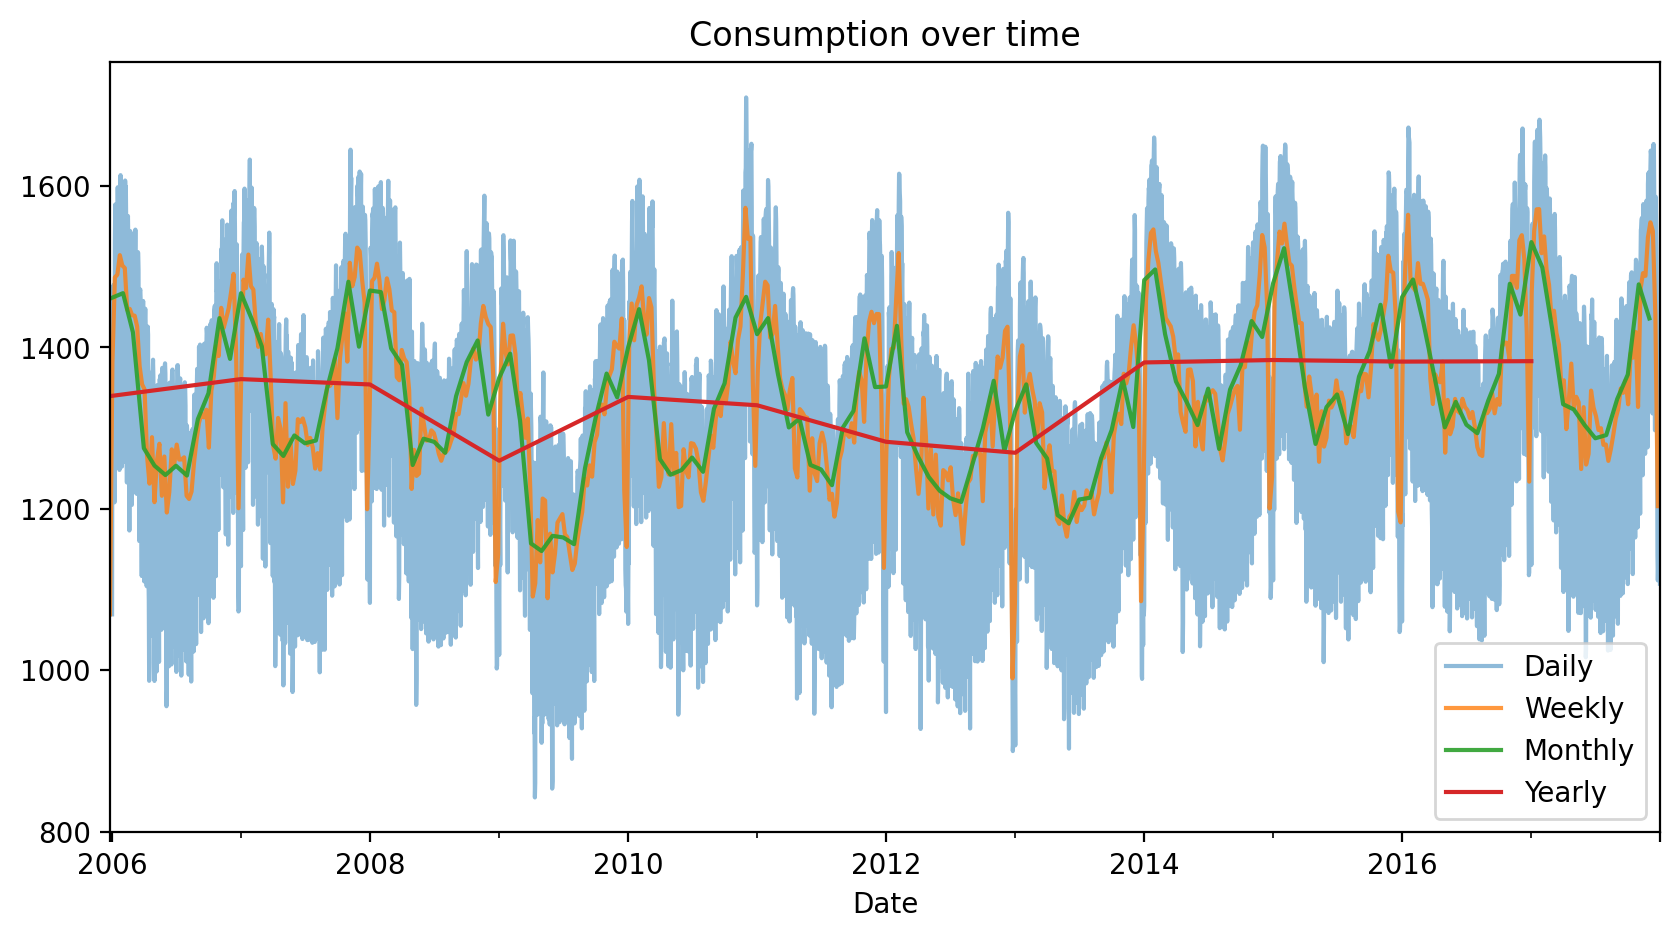

In [44]:
y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('Consumption over time')
plt.legend()
plt.show()

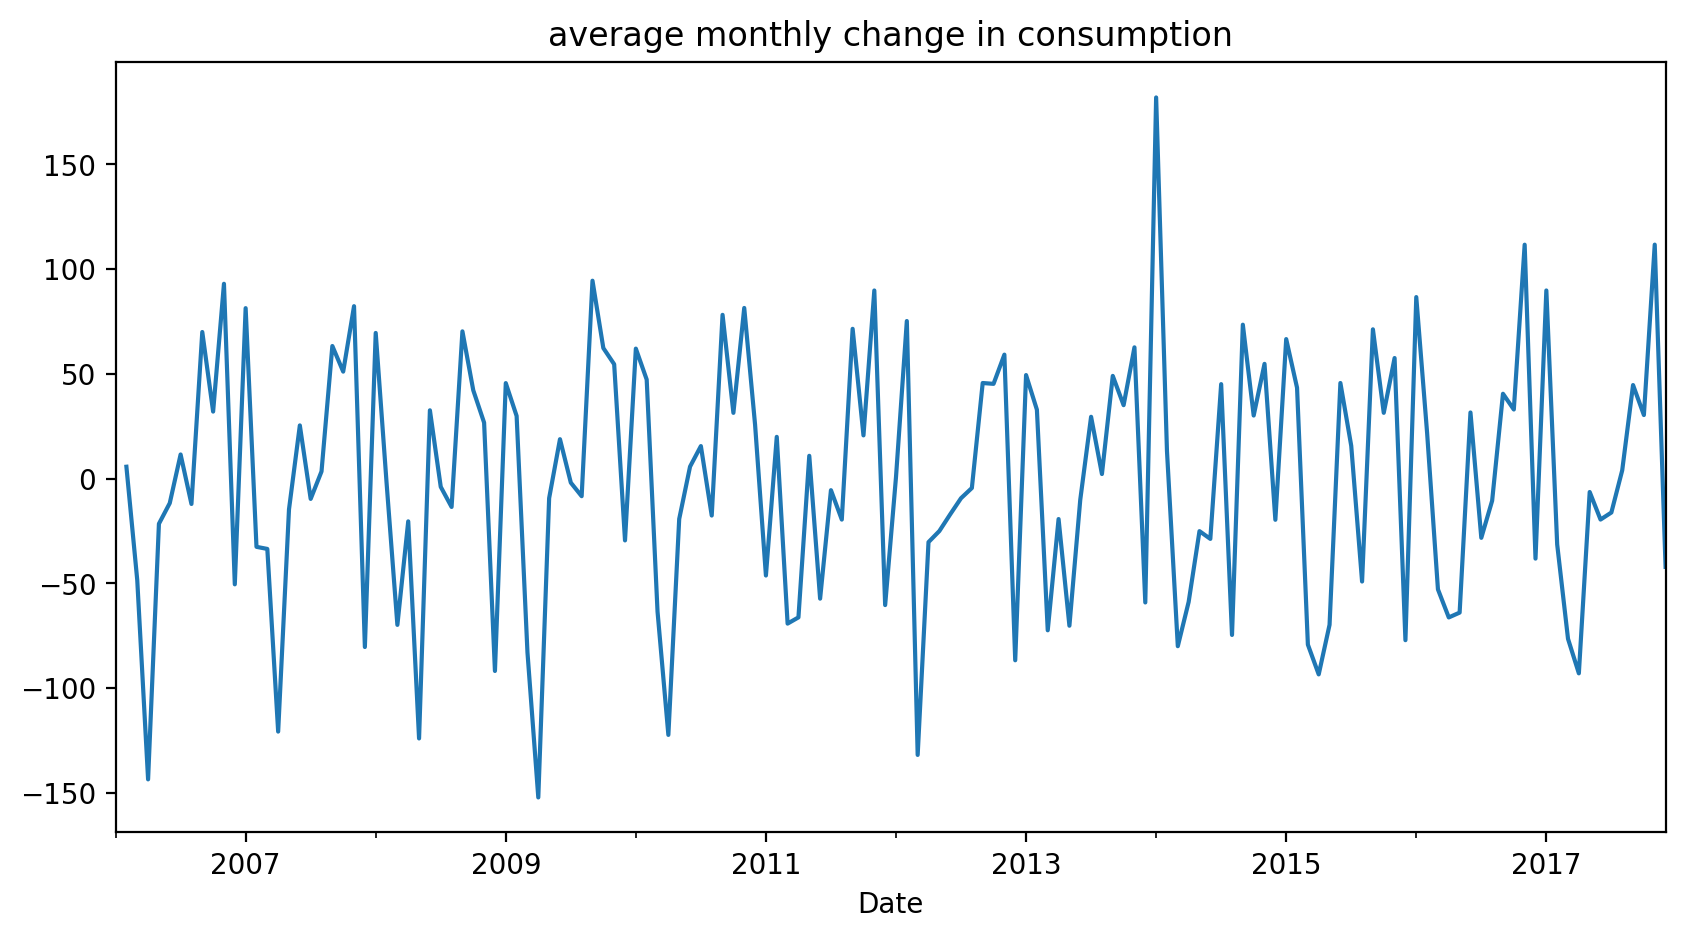

In [47]:
y.resample('M').mean().diff().plot(title='average monthly change in consumption');

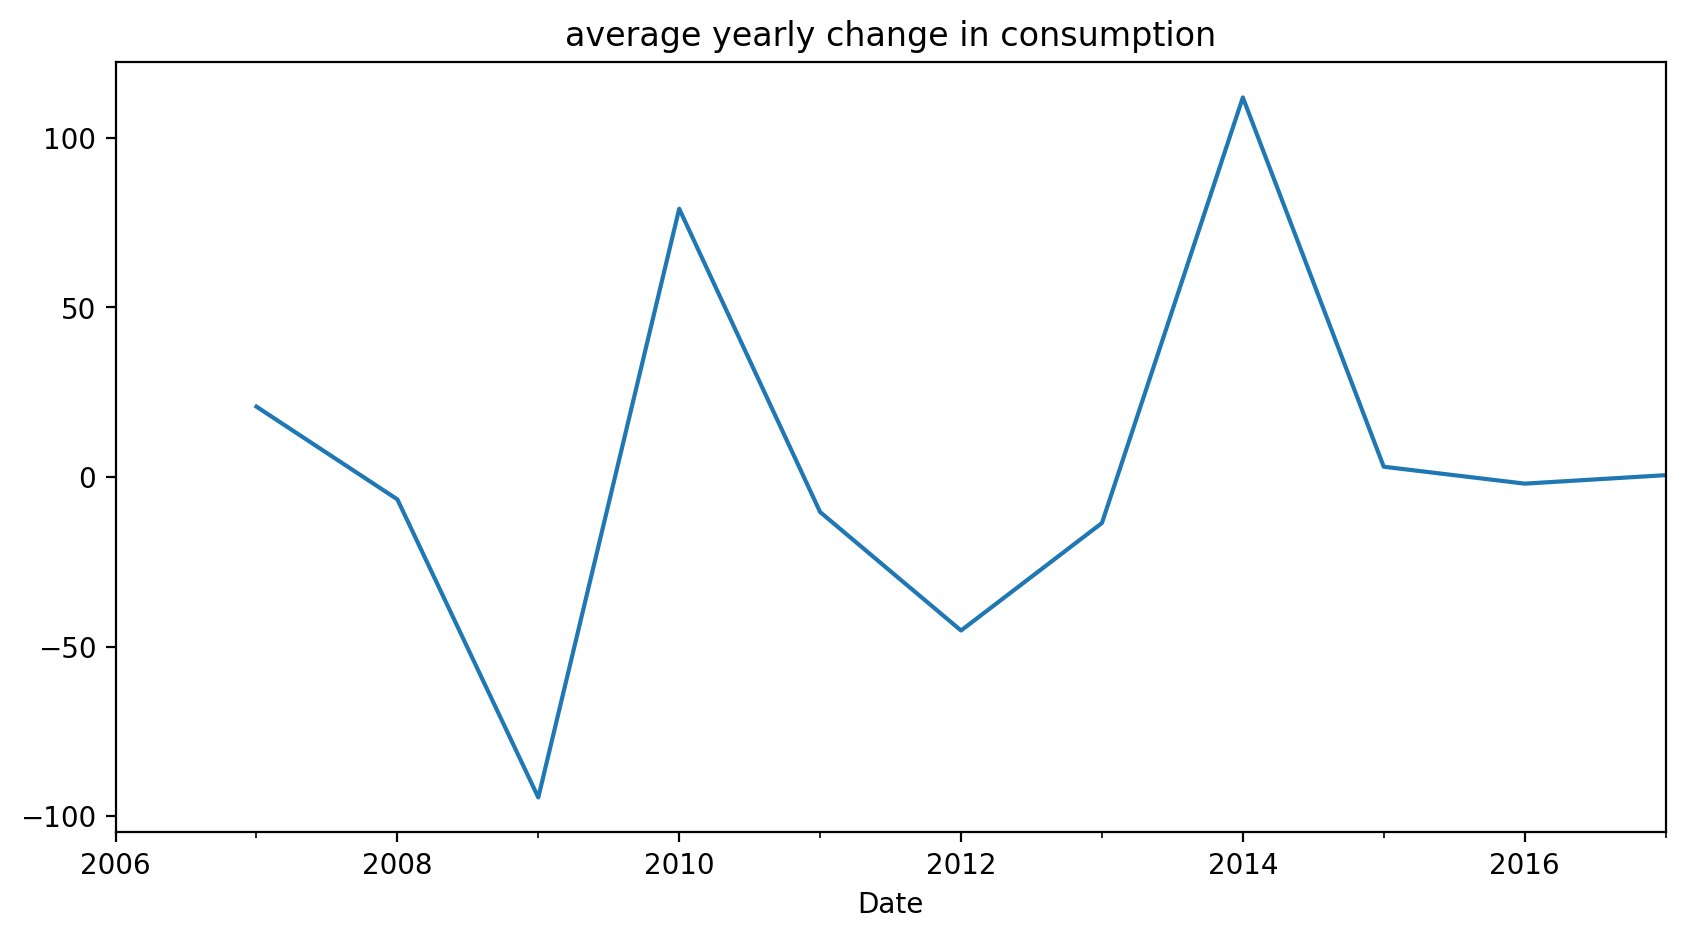

In [49]:
y.resample('Y').mean().diff().plot(title='average yearly change in consumption');

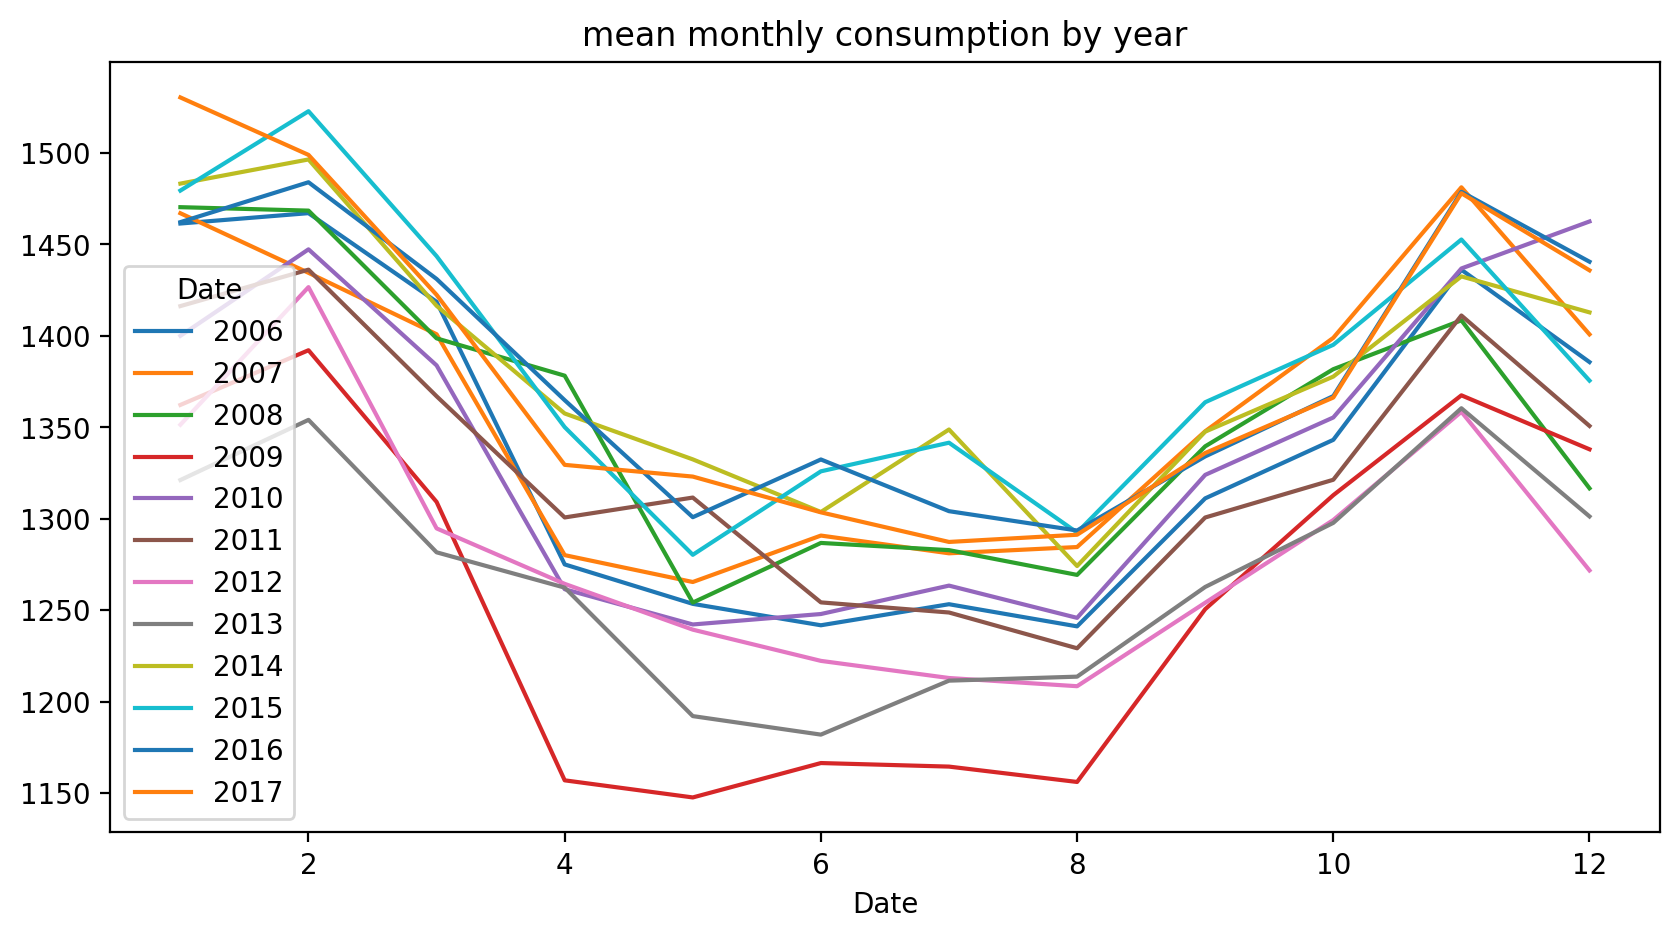

In [51]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly consumption by year')
plt.show()